<a href="https://colab.research.google.com/github/TechWhizGenius/Teja_INFO5731_Fall2024/blob/Project-5731/Project5731_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This File Contains topic modeling using below three algorithms:

1. LDA
2. LSA
3. Bertopic

Topic modeling is implemented to find research trends in autonomous driving.

Effective visualizations are created to understand the topics better and at the end time series analysis is implemented using Bertopic.

In [ ]:
# Importing necessay libraries to read corpus from Google Drive
# The corpus loaded here is already data annotated and basic processing is done.

from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Defining the path to the CSV file
file_path = '/content/drive/My Drive/INFO 5731 - Computational Methods/Project 5731/Scraped_Datasets/relevant_abstracts.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Title   Authors  \
0  A robust and real-time lane detection method i...  Zhang R.   
1  The effect of dual training on the hazard resp...  Huang C.   
2  Artificial intelligence based object detection...   Preeti    
3  Who is performing the driving tasks after inte...    Kim S.   
4  Recent advances in Machine Learning based Adva...  Tatar G.   

                                            Abstract  Year  Relevance  
0  Lane detection, which relies on front-view RGB...  2024          1  
1  To ensure traffic safety when driving with an ...  2024          1  
2  Autonomous vehicles (AV) are anticipated to ha...  2024          1  
3  Mode awareness is important for the safe use o...  2024          1  
4  In recent years, the rise of traffic in modern...  2024          1

**1. LDA**

Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package.

In [ ]:
# Install necessary libraries
!pip install nltk gensim
!pip install pyLDAvis


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, CoherenceModel

import nltk
nltk.download('punkt_tab')

import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Coherence Scores for Different Numbers of Topics:
Number of Topics: 5, Coherence Score: 0.4323
Number of Topics: 6, Coherence Score: 0.4480
Number of Topics: 7, Coherence Score: 0.4578
Number of Topics: 8, Coherence Score: 0.4793
Number of Topics: 9, Coherence Score: 0.4521
Number of Topics: 10, Coherence Score: 0.4627
Number of Topics: 11, Coherence Score: 0.4711
Number of Topics: 12, Coherence Score: 0.4669
Number of Topics: 13, Coherence Score: 0.4705
Number of Topics: 14, Coherence Score: 0.4759
Number of Topics: 15, Coherence Score: 0.5033
Number of Topics: 16, Coherence Score: 0.4642
Number of Topics: 17, Coherence Score: 0.5003
Number of Topics: 18, Coherence Score: 0.4847
Number of Topics: 19, Coherence Score: 0.4807
Number of Topics: 20, Coherence Score: 0.4908
Number of Topics: 21, Coherence Score: 0.4981
Number of Topics: 22, Coherence Score: 0.4684
Number of Topics: 23, Coherence Score: 0.4870
Number of Topics: 24, Coherence Score: 0.4993
Number of Topics: 25, Coherence Sco

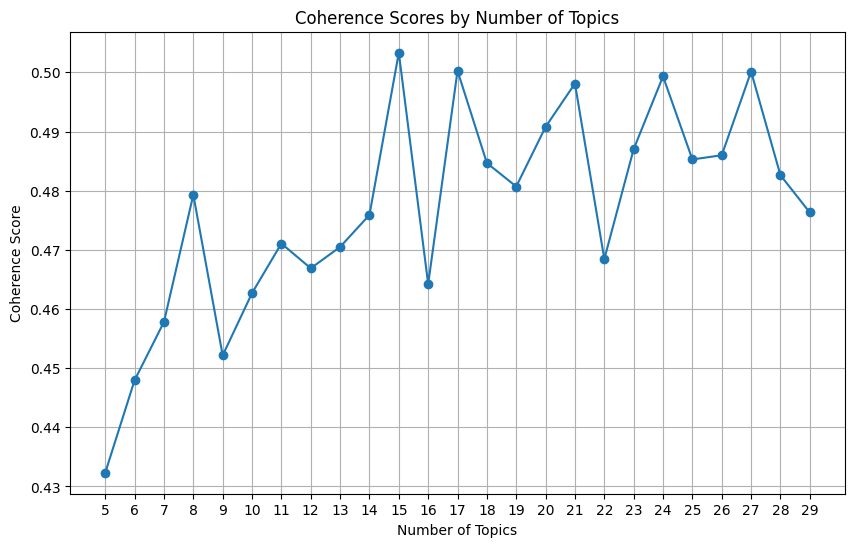

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords
stop_words = stopwords.words('english')

# Text cleaning function
def clean_text(x):
    x = str(x).lower()
    x = re.sub(r'#[A-Za-z0-9]*', ' ', x)  # Remove hashtags
    x = re.sub(r'https*://.*', ' ', x)  # Remove URLs
    x = re.sub(r'@[A-Za-z0-9]+', ' ', x)  # Remove mentions
    tokens = word_tokenize(x)  # Tokenize text
    x = ' '.join([w for w in tokens if w not in stop_words])  # Remove stopwords
    x = re.sub(r'[%s]' % re.escape('!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)  # Remove punctuation
    x = re.sub(r'\d+', ' ', x)  # Remove digits
    x = re.sub(r'\s{2,}', ' ', x)  # Remove extra spaces
    return x

# Load and preprocess dataset
df['clean_Abstract'] = df['Abstract'].apply(clean_text)
abstract_list = df['clean_Abstract'].tolist()
abstract_tokens = [text.split() for text in abstract_list]

# Create dictionary and corpus
dictionary = Dictionary(abstract_tokens)
corpus = [dictionary.doc2bow(text) for text in abstract_tokens]

# Function to calculate coherence scores
def calculate_coherence(dictionary, corpus, texts, limit, start=5, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Specify topic range and calculate coherence scores
start, limit, step = 5, 30, 1
model_list, coherence_values = calculate_coherence(dictionary, corpus, abstract_tokens, limit, start, step)

# Print coherence scores for all topics
print("Coherence Scores for Different Numbers of Topics:")
for num_topics, coherence in zip(range(start, limit, step), coherence_values):
    print(f"Number of Topics: {num_topics}, Coherence Score: {coherence:.4f}")

# Determine the optimal number of topics
optimal_topics = start + coherence_values.index(max(coherence_values)) * step
print(f"\nOptimal number of topics: {optimal_topics}")

# Extract and print the optimal topics
optimal_model = model_list[coherence_values.index(max(coherence_values))]
print("\nOptimal Topics and their Keywords:")
for idx, topic in optimal_model.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")

# Plot coherence scores
plt.figure(figsize=(10, 6))
plt.plot(range(start, limit, step), coherence_values, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores by Number of Topics")
plt.xticks(range(start, limit, step))
plt.grid()
plt.show()


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
lda_vis = gensimvis.prepare(optimal_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


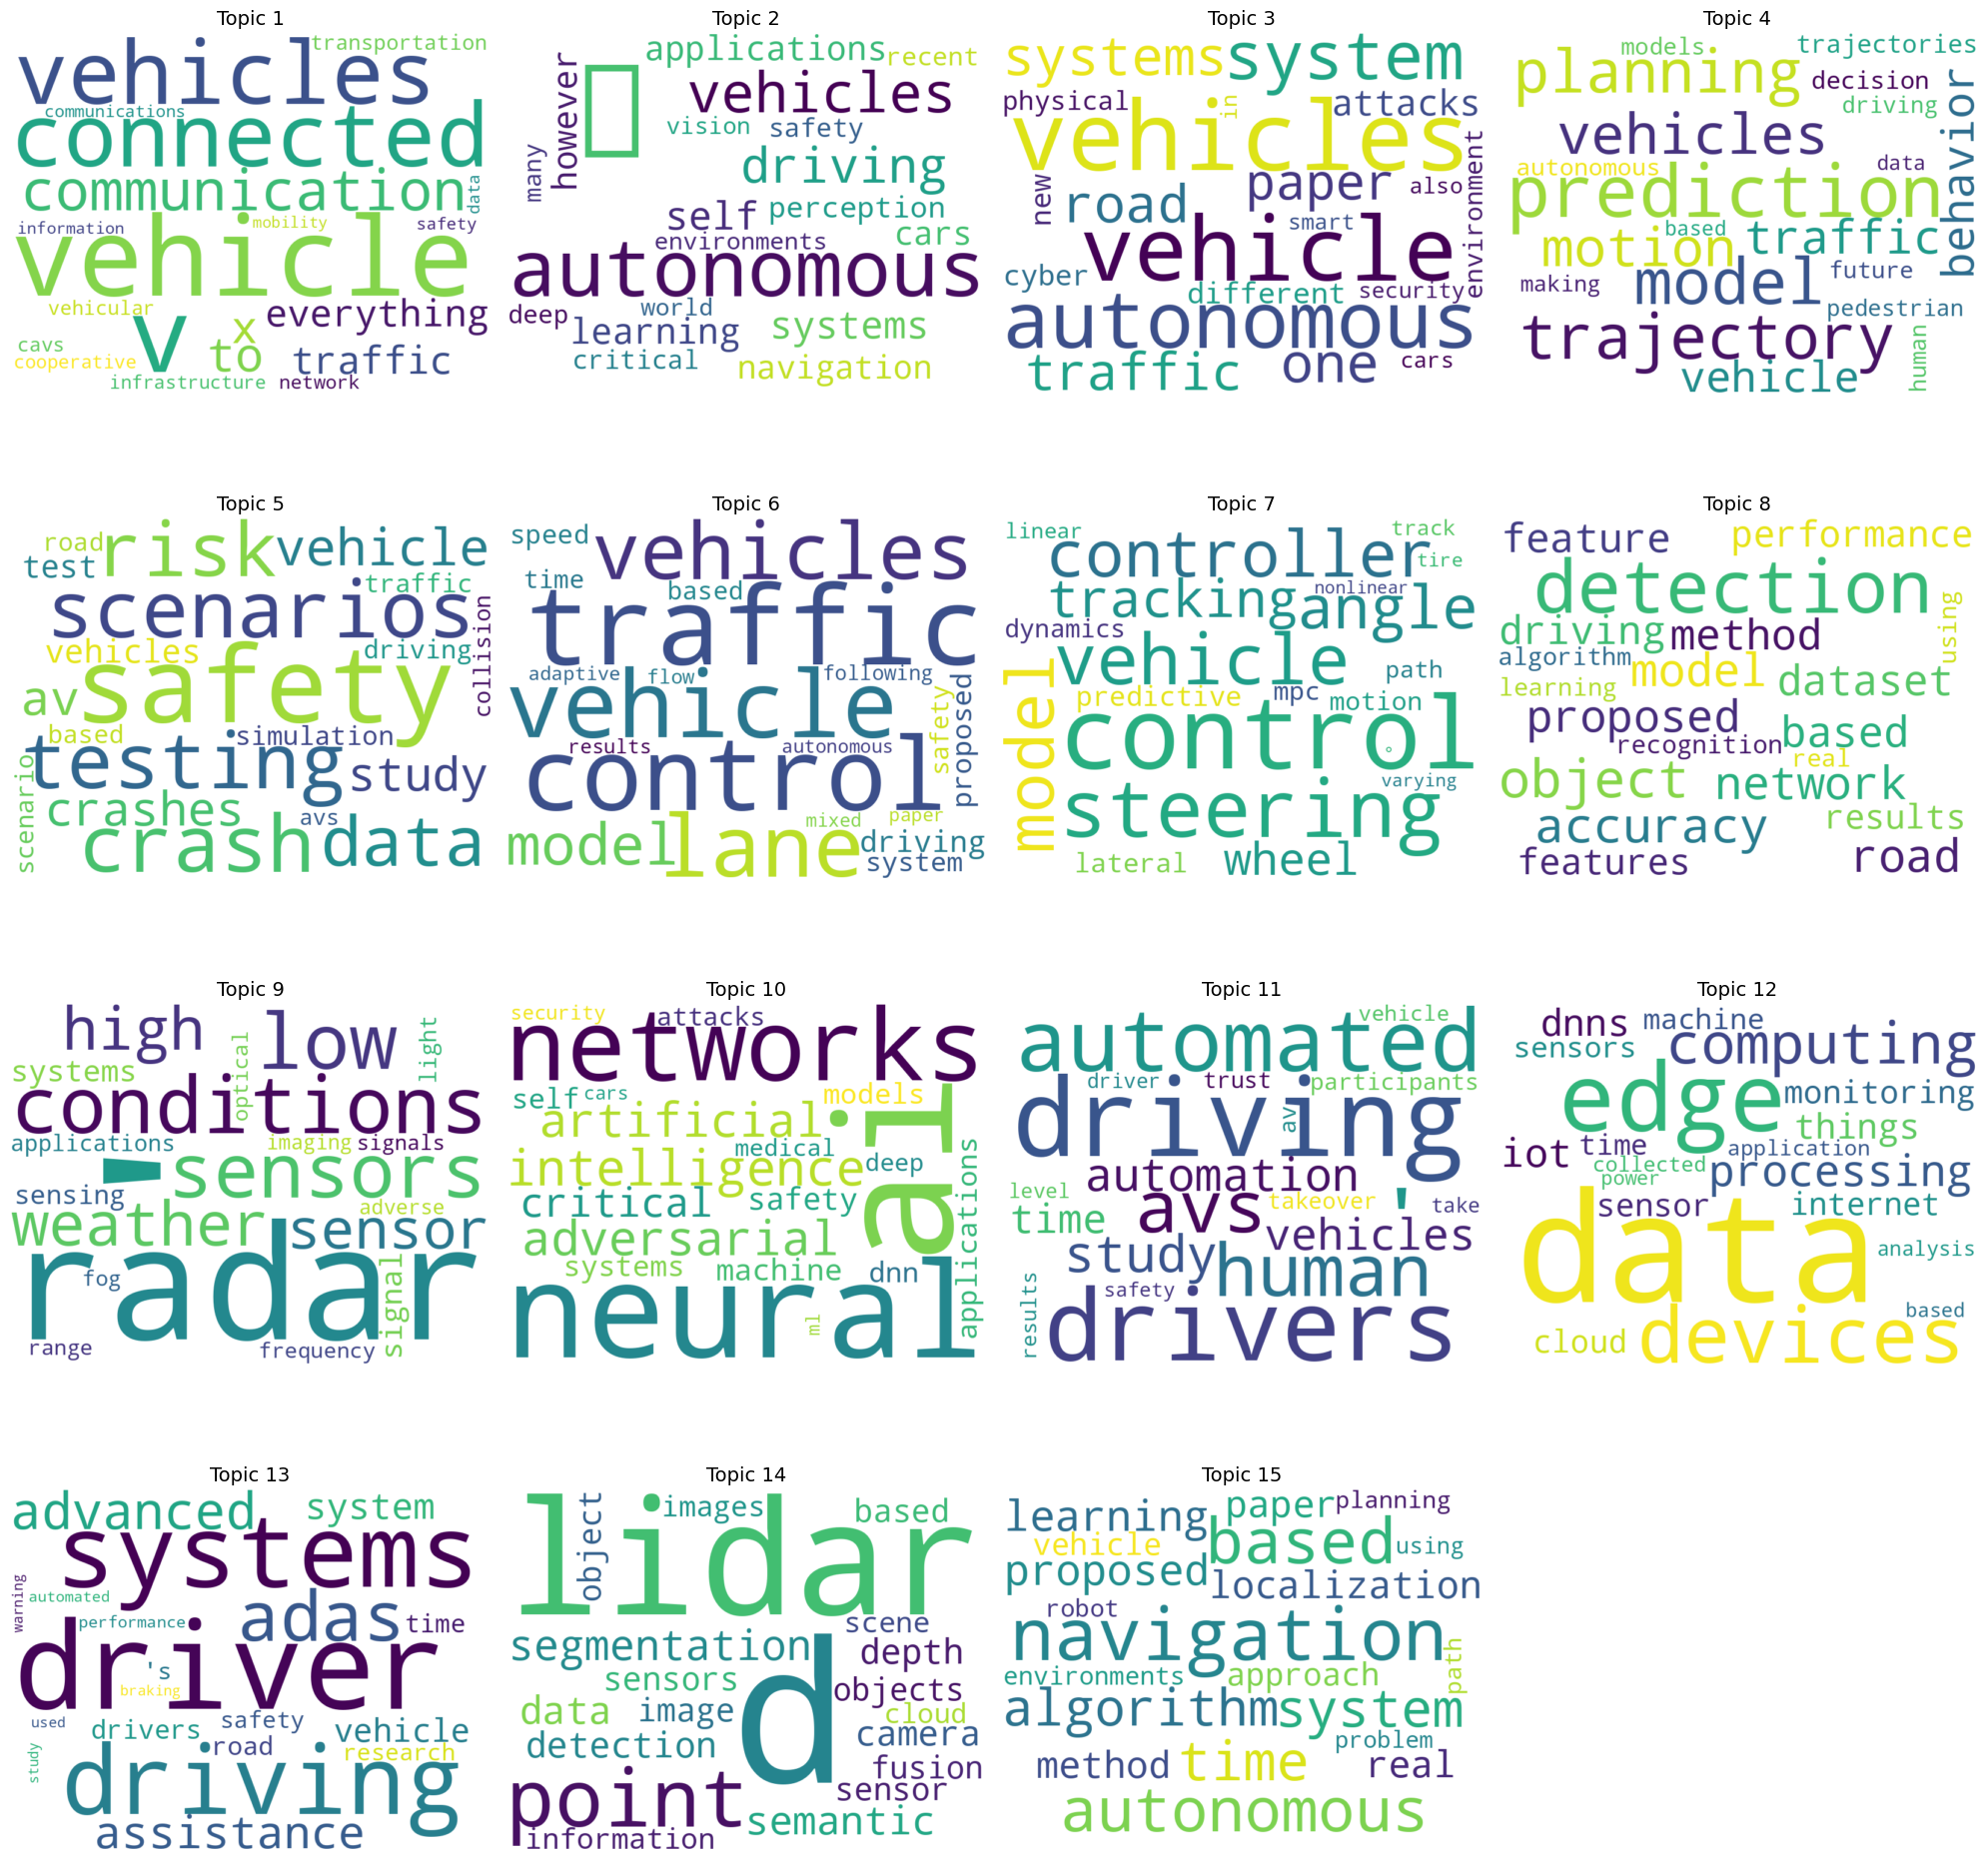

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

# Number of topics you want to display - Give optimal no. of topics as input
num_topics = 15  # Adjust this according to your optimal topics
topics_per_row = 4  # Number of topics per row

# Calculate the number of rows needed
num_rows = math.ceil(num_topics / topics_per_row)

# Set up the figure for the word clouds
fig, axes = plt.subplots(num_rows, topics_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each topic and generate a word cloud
for idx in range(num_topics):
    # Get top 20 terms for the current topic
    topic_terms = optimal_model.get_topic_terms(idx, topn=20)
    word_frequencies = {dictionary[word_id]: weight for word_id, weight in topic_terms}

    # Generate the word cloud from frequencies
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(word_frequencies)

    # Display the word cloud in the subplot
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis("off")  # Hide axes for better visualization
    axes[idx].set_title(f"Topic {idx + 1}", fontsize=14)

# Remove any unused axes if the number of topics is not a multiple of 4
for i in range(num_topics, len(axes)):
    fig.delaxes(axes[i])

# Show the word clouds
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-ac1d9d2a4c31>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', num_topics)  # 'tab20' is a good colormap for up to 20 topics


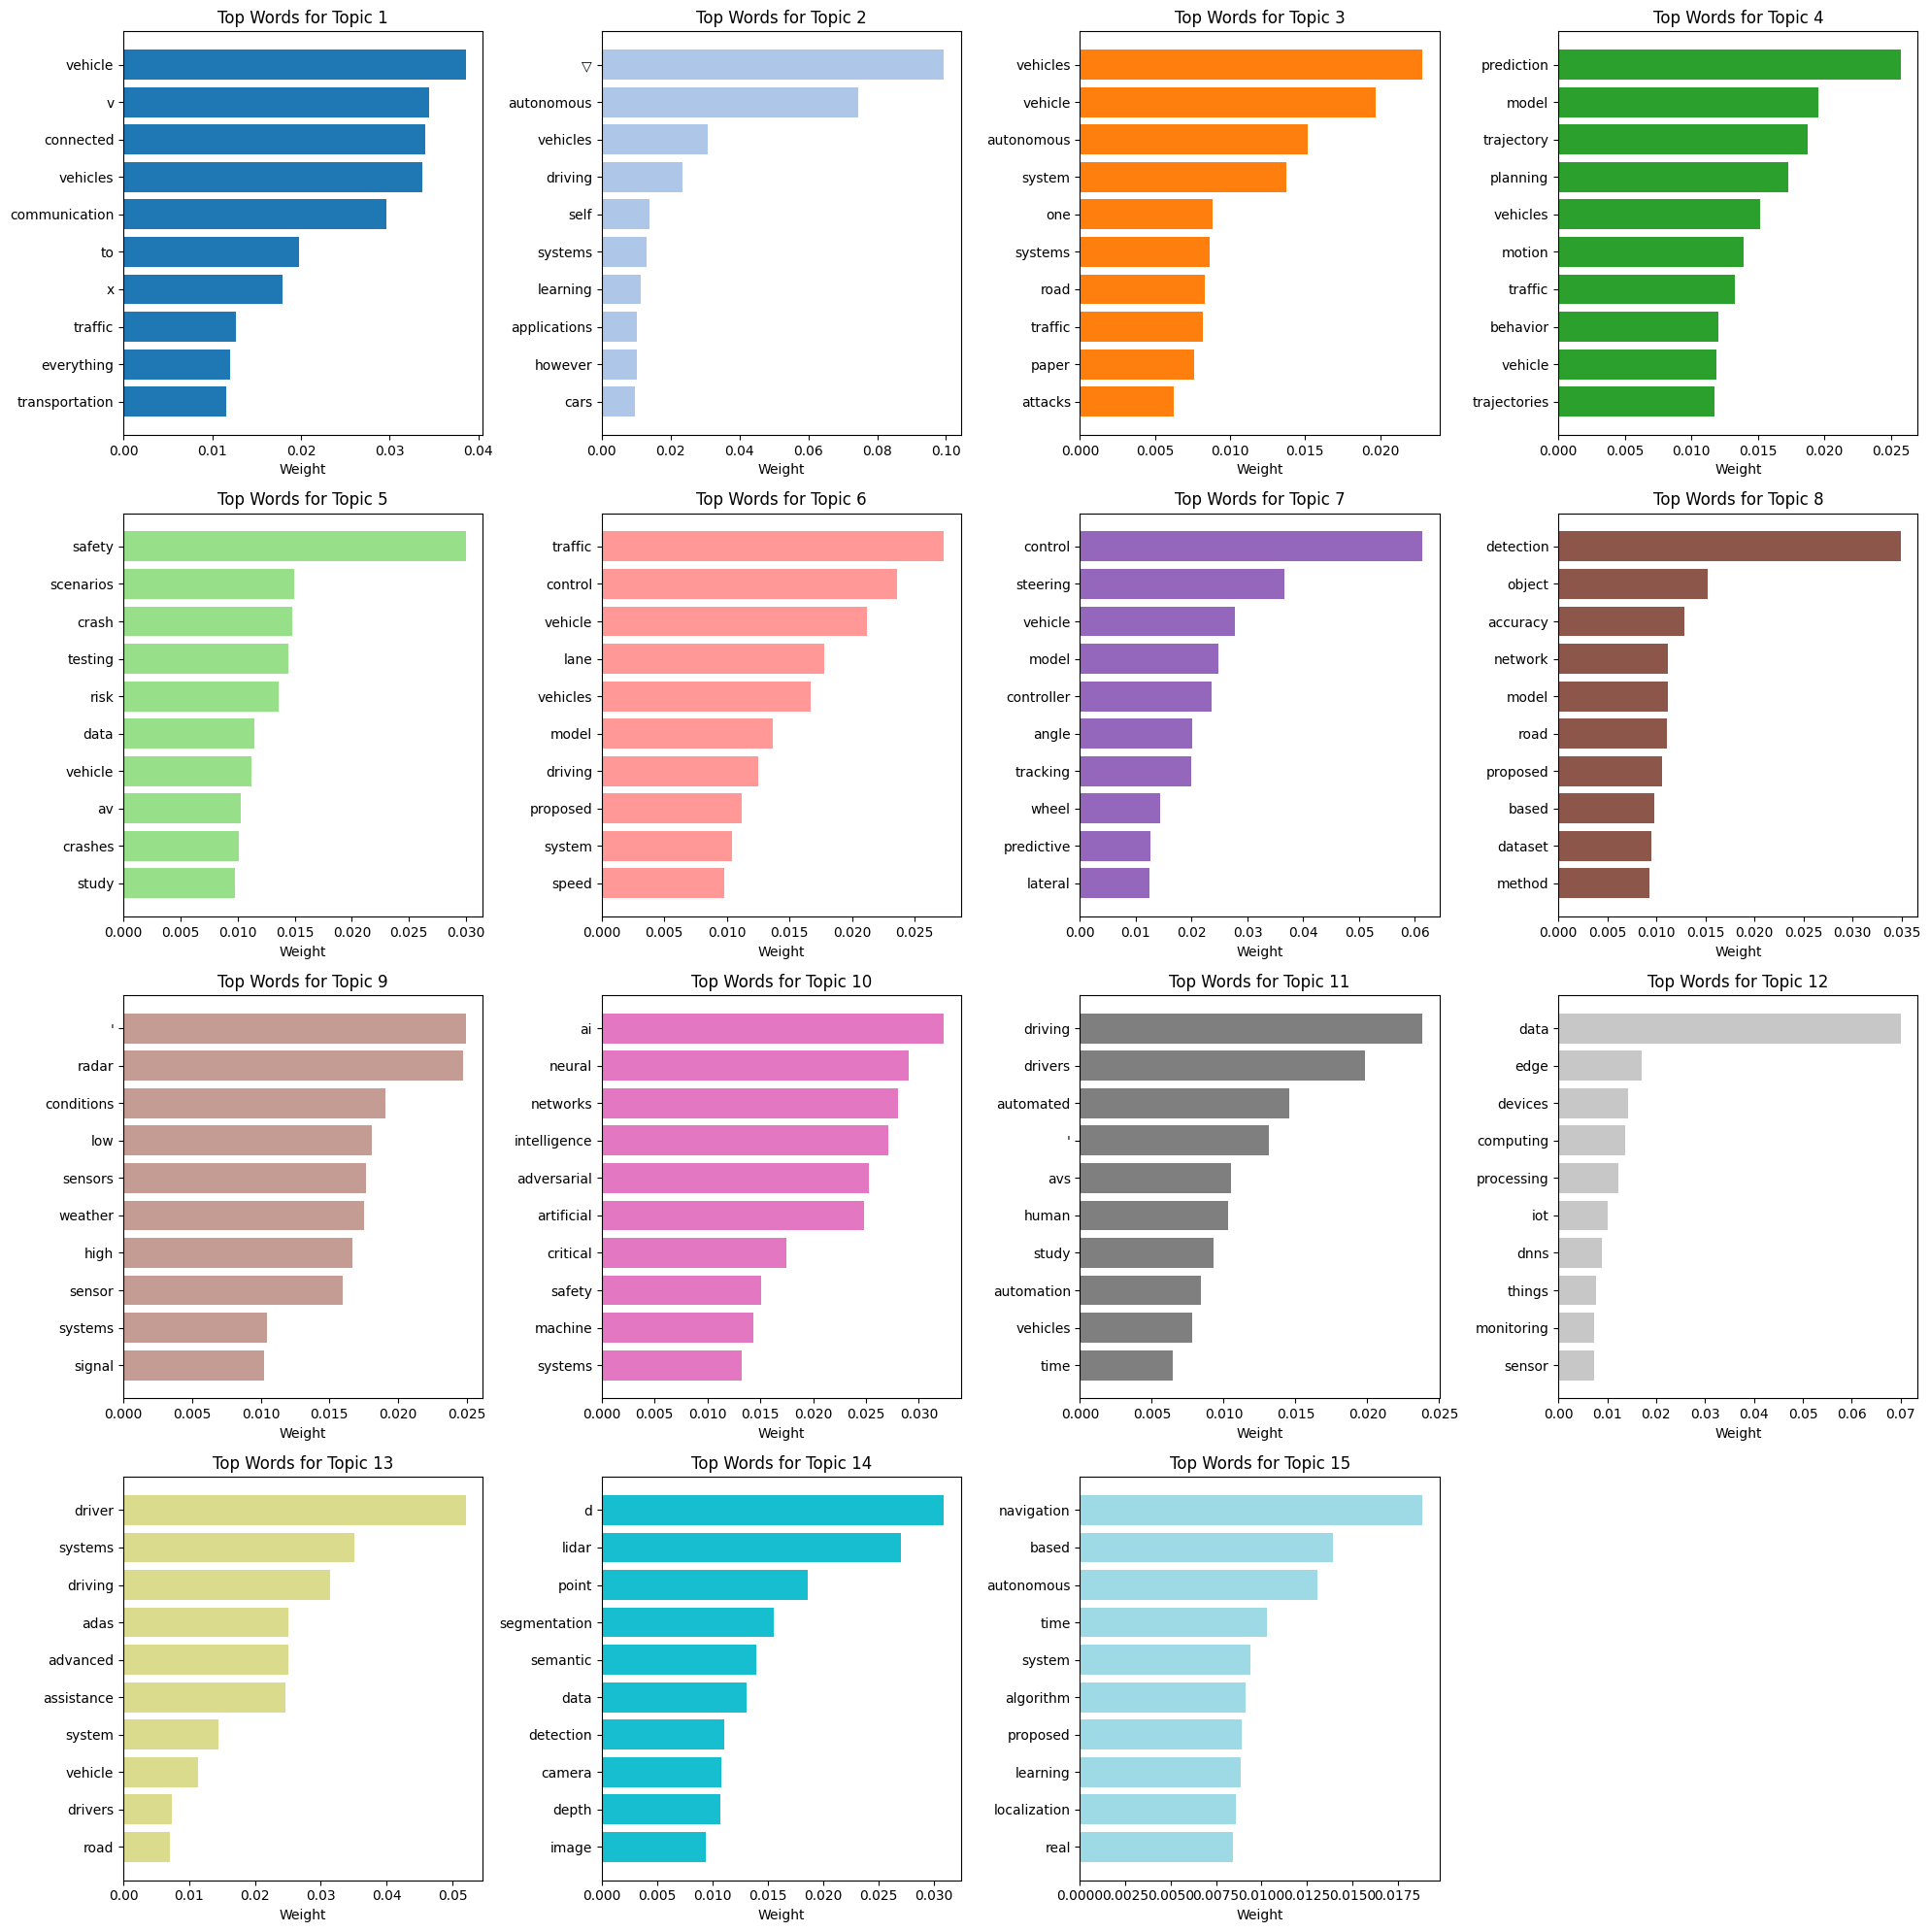

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Number of topics you want to display
num_topics = optimal_topics  # Adjust this according to your dataset
topics_per_row = 4  # Number of topics per row

# Calculate the number of rows needed
num_rows = math.ceil(num_topics / topics_per_row)

# Set up the figure for the bar charts
fig, axes = plt.subplots(num_rows, topics_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create a colormap with as many colors as topics
colormap = plt.cm.get_cmap('tab20', num_topics)  # 'tab20' is a good colormap for up to 20 topics

# Loop through each topic and generate a bar chart for the top words
for topic_idx in range(num_topics):
    top_words = optimal_model.show_topic(topic_idx, topn=10)

    words, weights = zip(*top_words)

    # Get a color for the topic
    color = colormap(topic_idx / num_topics)  # Normalize the index to get a color

    # Create the bar chart
    axes[topic_idx].barh(words, weights, color=color)
    axes[topic_idx].set_xlabel("Weight")
    axes[topic_idx].set_title(f"Top Words for Topic {topic_idx + 1}")
    axes[topic_idx].invert_yaxis()  # Invert the y-axis for better visualization

# Remove any unused axes if the number of topics is not a multiple of 4
for i in range(num_topics, len(axes)):
    fig.delaxes(axes[i])

# Show the bar charts
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


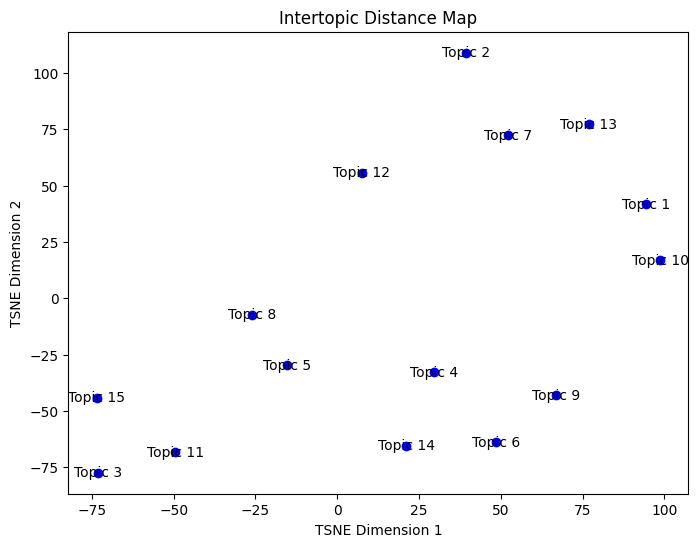

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

topic_word_dist = np.array([
    [weight for _, weight in optimal_model.get_topic_terms(topic_id, topn=len(dictionary))]
    for topic_id in range(optimal_topics)
])

tsne_model = TSNE(n_components=2, random_state=42, perplexity=min(optimal_topics - 1, 5))
tsne_results = tsne_model.fit_transform(topic_word_dist)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue')
for idx, (x, y) in enumerate(tsne_results):
    plt.text(x, y, f"Topic {idx + 1}", fontsize=10, ha='center', va='center')
plt.title("Intertopic Distance Map")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.show()


**2. LSA**

LSA (Latent Semantic Analysis) also known as LSI (Latent Semantic Index) LSA uses bag of word(BoW) model, which results in a term-document matrix(occurrence of terms in a document). Rows represent terms and columns represent documents. LSA learns latent topics by performing a matrix decomposition on the document-term matrix using Singular value decomposition. LSA is typically used as a dimension reduction or noise reducing technique.


In [ ]:
!pip install umap-learn
!pip install --upgrade nltk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install scipy==1.10.1  # Downgrade SciPy to avoid gensim import problems

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:

# Preprocess the text (tokenize, remove stopwords, and stem)
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []

    for i in doc_set:
        if pd.isna(i):
            continue  # Skip NaN values
        raw = str(i).lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [token for token in tokens if token not in en_stop]
        stemmed_tokens = [p_stemmer.stem(token) for token in stopped_tokens]
        texts.append(stemmed_tokens)

    return texts

# Prepare the corpus (dictionary and doc-term matrix)
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary, doc_term_matrix

# Compute coherence values for different numbers of topics
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, start, stop, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence = coherencemodel.get_coherence()
        coherence_values.append(coherence)
        print(f"Coherence score for {num_topics} topics: {coherence:.4f}")

    return model_list, coherence_values

# Plot the coherence score graph
def plot_coherence_graph(coherence_values, start, stop, step):
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")
    plt.title("Coherence Score vs Number of Topics")
    plt.show()

# Display 12 topics with coherence scores
def display_topics(model, coherence_score, num_words):
    print(f"\nTopics found in the LSA model with 30 topics:")
    topics = model.print_topics(num_topics=30, num_words=num_words)
    for topic_num, topic_words in topics:
        print(f"Topic {topic_num}: {topic_words}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence score for 2 topics: 0.4281
Coherence score for 3 topics: 0.4259
Coherence score for 4 topics: 0.4207
Coherence score for 5 topics: 0.4258
Coherence score for 6 topics: 0.4183
Coherence score for 7 topics: 0.4200
Coherence score for 8 topics: 0.3854
Coherence score for 9 topics: 0.3922
Coherence score for 10 topics: 0.4093
Coherence score for 11 topics: 0.3819
Coherence score for 12 topics: 0.3664
Coherence score for 13 topics: 0.3730
Coherence score for 14 topics: 0.3380
Coherence score for 15 topics: 0.3788
Coherence score for 16 topics: 0.3493
Coherence score for 17 topics: 0.3752
Coherence score for 18 topics: 0.3422
Coherence score for 19 topics: 0.3444
Coherence score for 20 topics: 0.3521
Coherence score for 21 topics: 0.3572
Coherence score for 22 topics: 0.3434
Coherence score for 23 topics: 0.3361
Coherence score for 24 topics: 0.3426
Coherence score for 25 topics: 0.3403
Coherence score for 26 topics: 0.3347
Coherence score for 27 topics: 0.3456
Coherence score for 

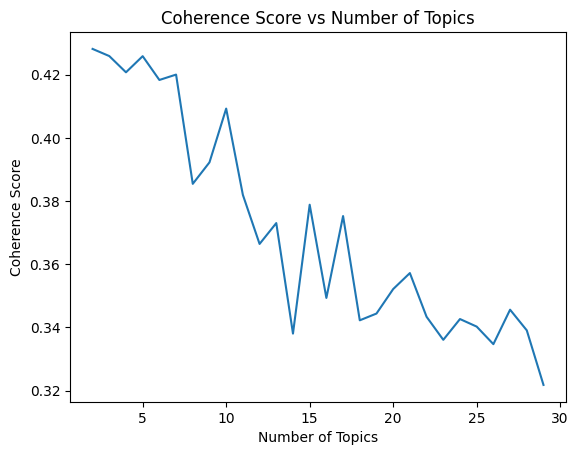


Topics found in the LSA model with 30 topics:
Topic 0: 0.434*"vehicl" + 0.251*"drive" + 0.206*"system" + 0.198*"model" + 0.185*"driver" + 0.184*"use" + 0.168*"autonom" + 0.148*"propos" + 0.145*"base" + 0.133*"traffic"
Topic 1: -0.490*"driver" + -0.388*"drive" + -0.260*"autom" + 0.225*"detect" + 0.182*"propos" + 0.181*"method" + 0.144*"object" + 0.134*"base" + 0.120*"network" + 0.117*"autonom"
Topic 2: 0.669*"vehicl" + -0.271*"drive" + -0.240*"driver" + -0.223*"detect" + 0.161*"traffic" + -0.152*"object" + 0.132*"av" + -0.124*"method" + -0.120*"perform" + -0.114*"imag"
Topic 3: -0.599*"model" + -0.354*"traffic" + 0.301*"vehicl" + 0.279*"system" + 0.170*"autonom" + 0.154*"sensor" + -0.154*"av" + -0.132*"predict" + -0.131*"cav" + -0.120*"lane"
Topic 4: 0.548*"av" + -0.353*"control" + 0.286*"crash" + 0.197*"safeti" + -0.194*"model" + 0.192*"road" + -0.170*"vehicl" + -0.170*"drive" + 0.141*"detect" + 0.135*"studi"
Topic 5: 0.519*"drive" + -0.469*"system" + 0.308*"autonom" + -0.261*"driver"

In [ ]:
# Preprocess the dataset
doc_clean = preprocess_data(df['Abstract'])

# Define range for coherence evaluation
start, stop, step = 2, 30, 1  # Evaluate from 2 to 12 topics
dictionary, doc_term_matrix = prepare_corpus(doc_clean)

# Compute coherence values
model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean, start, stop, step)

# Plot coherence score graph
plot_coherence_graph(coherence_values, start, stop, step)

# Correct the index access for coherence score
num_topics_to_display = 30
# Model with 12 topics
model_12_topics = LsiModel(doc_term_matrix, num_topics=num_topics_to_display, id2word=dictionary)

# Coherence value for 12 topics will be at the index of (num_topics_to_display - start - 1)
coherence_12_topics = coherence_values[num_topics_to_display - start - 1]

# Display topics for the LSA model with 12 topics
display_topics(model_12_topics, coherence_12_topics, num_words=10)  # Display 12 topics here


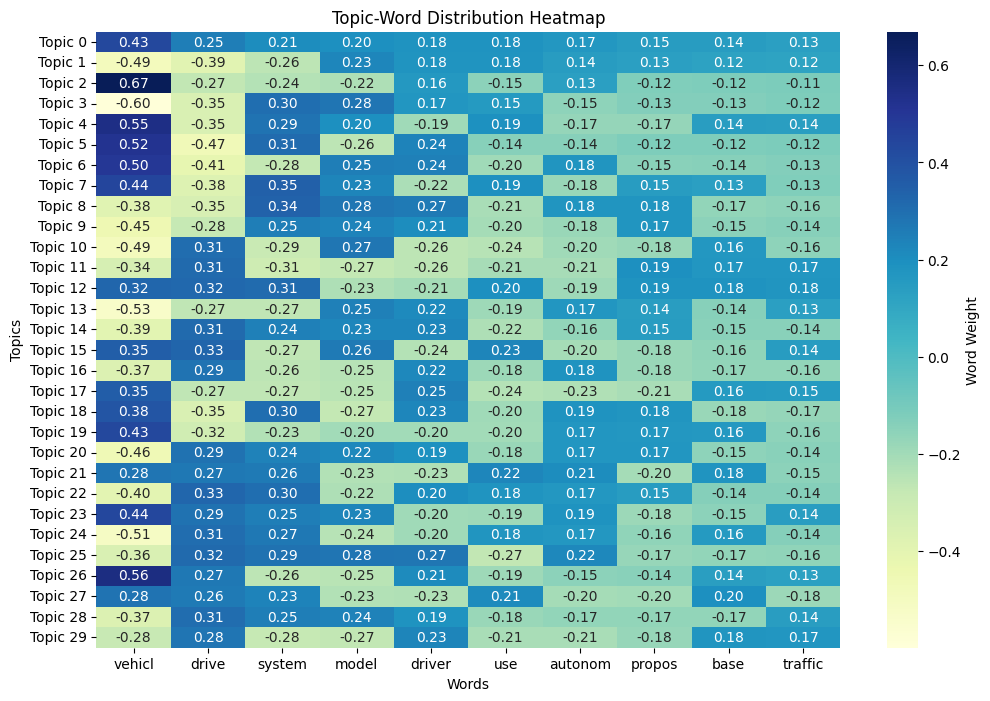

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a topic-word distribution matrix for the heatmap
def create_topic_word_matrix(model, num_topics, num_words):
    topics = model.print_topics(num_topics=num_topics, num_words=num_words)
    topic_word_matrix = []

    for topic_num, topic in topics:
        # Parse words and their weights
        words = topic.split(' + ')
        weights = [float(word.split('*')[0]) for word in words]
        terms = [word.split('*')[1].strip('"') for word in words]
        topic_word_matrix.append((terms, weights))

    return topic_word_matrix

# Plot the heatmap
def plot_topic_word_heatmap(topic_word_matrix, num_topics, num_words):
    # Prepare data for the heatmap
    topics = [f"Topic {i}" for i in range(num_topics)]
    words = topic_word_matrix[0][0]  # Assume the same words across topics
    weights_matrix = [row[1] for row in topic_word_matrix]

    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        weights_matrix,
        xticklabels=words,
        yticklabels=topics,
        cmap="YlGnBu",
        annot=True,
        fmt=".2f",
        cbar_kws={'label': 'Word Weight'}
    )
    plt.title("Topic-Word Distribution Heatmap")
    plt.xlabel("Words")
    plt.ylabel("Topics")
    plt.show()

# Create and plot the heatmap for the LSA model
num_topics = 30  # Number of topics to display
num_words = 10   # Number of words per topic
topic_word_matrix = create_topic_word_matrix(model_12_topics, num_topics, num_words)
plot_topic_word_heatmap(topic_word_matrix, num_topics, num_words)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


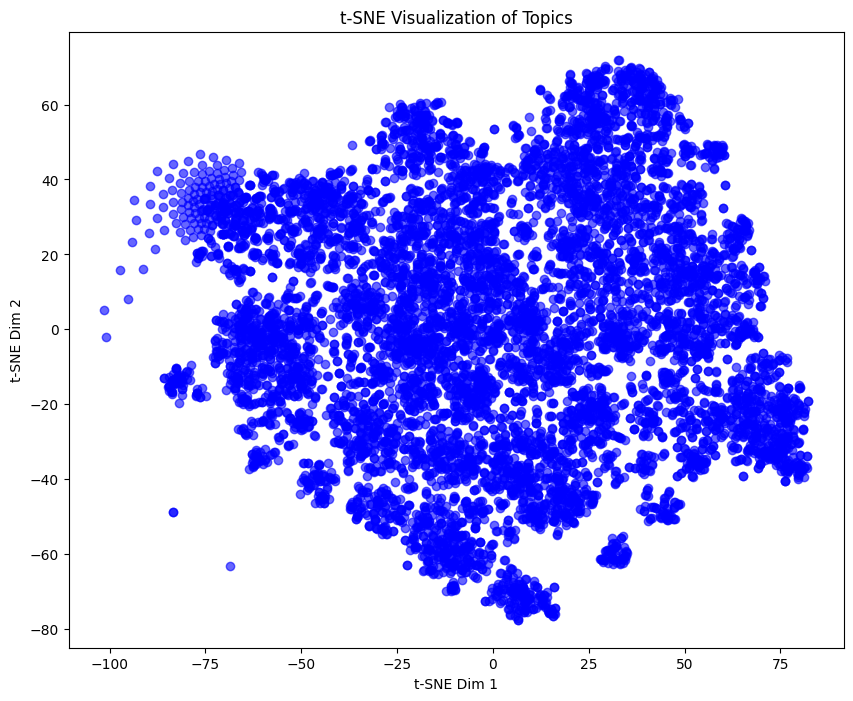

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


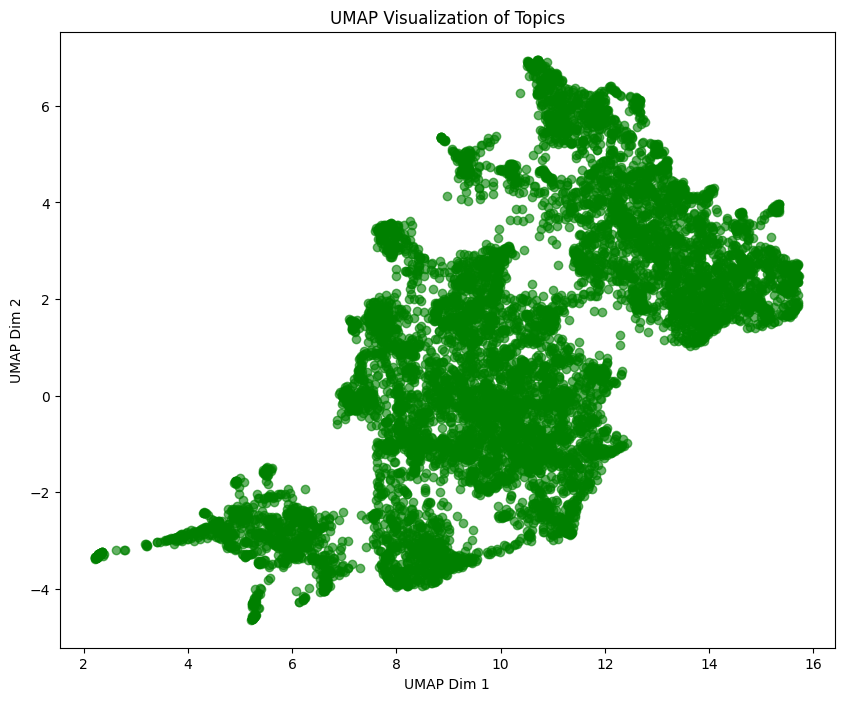

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Generate document-topic matrix from the LSA model
def get_document_topic_matrix(model, doc_term_matrix, num_topics):
    doc_topic_matrix = []

    for doc in doc_term_matrix:
        topic_weights = model[doc]  # Get topic weights for each document
        doc_weights = np.zeros(num_topics)
        for topic_id, weight in topic_weights:
            doc_weights[topic_id] = weight
        doc_topic_matrix.append(doc_weights)

    return np.array(doc_topic_matrix)

# t-SNE visualization
def plot_tsne(doc_topic_matrix):
    tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    tsne_values = tsne_model.fit_transform(doc_topic_matrix)

    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_values[:, 0], tsne_values[:, 1], alpha=0.6, c='blue')
    plt.title("t-SNE Visualization of Topics")
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.show()

# UMAP visualization
def plot_umap(doc_topic_matrix):
    umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
    umap_values = umap_model.fit_transform(doc_topic_matrix)

    plt.figure(figsize=(10, 8))
    plt.scatter(umap_values[:, 0], umap_values[:, 1], alpha=0.6, c='green')
    plt.title("UMAP Visualization of Topics")
    plt.xlabel("UMAP Dim 1")
    plt.ylabel("UMAP Dim 2")
    plt.show()

# Generate the document-topic matrix and visualize using t-SNE and UMAP
num_topics = 30  # Number of topics in your LSA model
doc_topic_matrix = get_document_topic_matrix(model_12_topics, doc_term_matrix, num_topics)

# Plot t-SNE and UMAP
plot_tsne(doc_topic_matrix)
plot_umap(doc_topic_matrix)


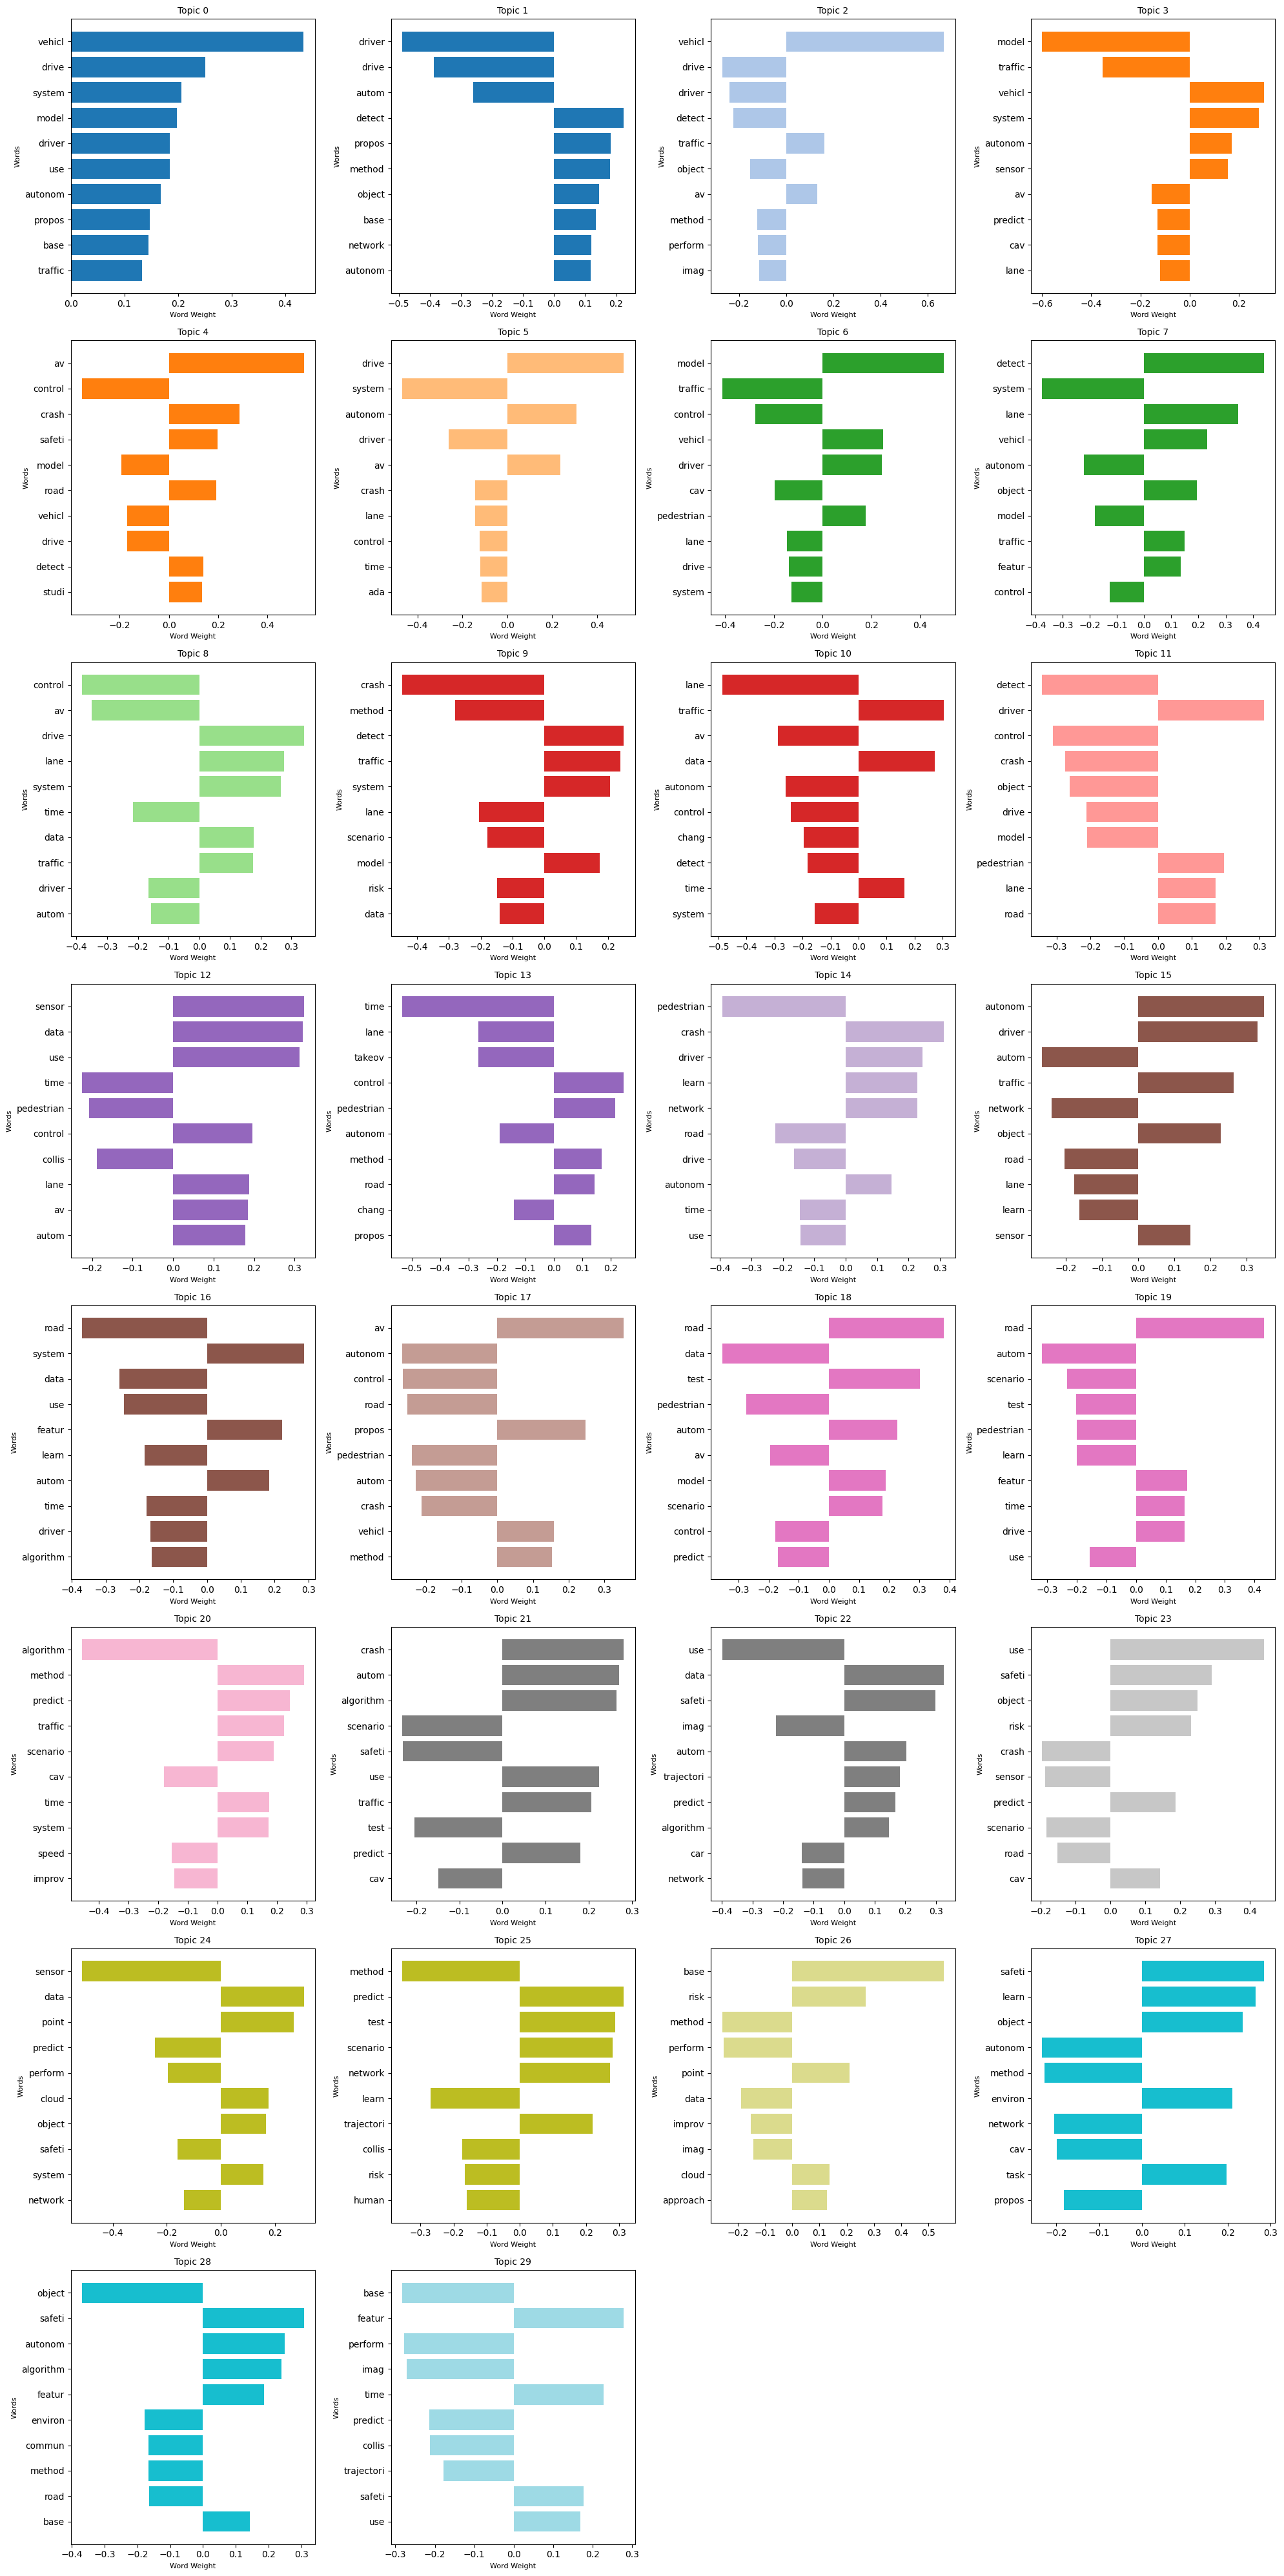

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

# Function to plot bar charts of top words for each topic in a grid layout
def plot_top_words_per_topic_grid_single_color(model, num_topics, num_words, graphs_per_row=4):
    rows = (num_topics + graphs_per_row - 1) // graphs_per_row  # Calculate the number of rows
    fig, axes = plt.subplots(rows, graphs_per_row, figsize=(20, rows * 5))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Generate a colormap with distinct colors for each topic
    cmap = get_cmap("tab20")  # Use a colormap with enough distinct colors
    topic_colors = [cmap(i / num_topics) for i in range(num_topics)]  # One color per topic

    for i in range(num_topics):
        # Get the top words and their weights for the current topic
        topic = model.show_topic(i, num_words)
        words, weights = zip(*topic)

        # Create a bar chart in the subplot
        ax = axes[i]
        y_pos = np.arange(len(words))
        ax.barh(y_pos, weights, color=topic_colors[i])  # Single color for the entire topic
        ax.set_yticks(y_pos)
        ax.set_yticklabels(words)
        ax.invert_yaxis()  # Invert y-axis for better readability
        ax.set_title(f"Topic {i}", fontsize=10)
        ax.set_xlabel("Word Weight", fontsize=8)
        ax.set_ylabel("Words", fontsize=8)

    # Hide any unused subplots
    for j in range(num_topics, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
num_topics = 30  # Number of topics in the LSA model
num_words = 10   # Number of top words to display for each topic
plot_top_words_per_topic_grid_single_color(model_12_topics, num_topics, num_words, graphs_per_row=4)


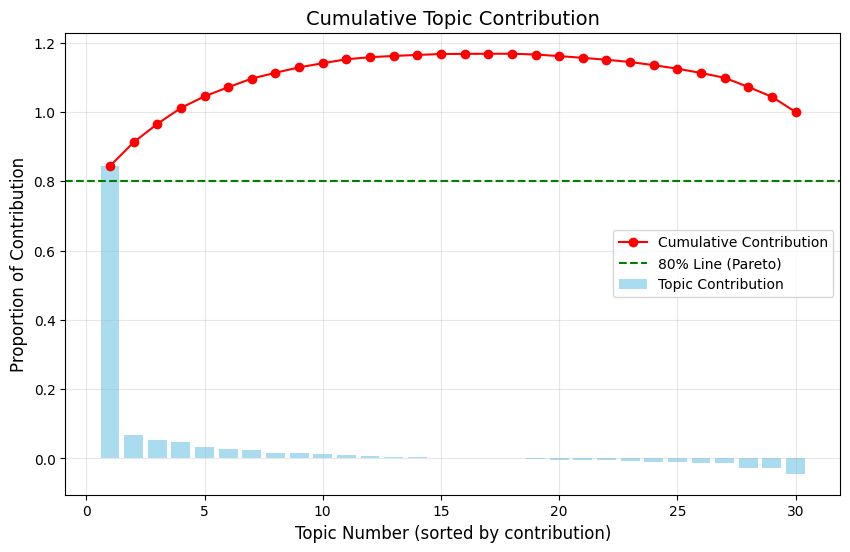

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate cumulative topic contributions
def cumulative_topic_contribution_plot(lsa_model, doc_term_matrix):
    # Get the topic-document matrix (how topics are distributed across documents)
    topic_contributions = np.zeros(lsa_model.num_topics)

    for doc in doc_term_matrix:
        # Get the topic distribution for the current document
        doc_topics = lsa_model[doc]
        for topic_id, contribution in doc_topics:
            topic_contributions[topic_id] += contribution

    # Sort topics by their contribution for clarity
    sorted_indices = np.argsort(topic_contributions)[::-1]
    sorted_contributions = topic_contributions[sorted_indices]
    sorted_cumulative_contributions = np.cumsum(sorted_contributions)

    # Normalize contributions and cumulative contributions to represent proportions
    total_contribution = sorted_contributions.sum()
    sorted_contributions = sorted_contributions / total_contribution
    sorted_cumulative_contributions = sorted_cumulative_contributions / total_contribution

    # Plot cumulative contributions
    topics = range(1, len(sorted_contributions) + 1)

    plt.figure(figsize=(10, 6))
    plt.bar(topics, sorted_contributions, alpha=0.7, label="Topic Contribution", color='skyblue')
    plt.plot(topics, sorted_cumulative_contributions, marker='o', color='red', label="Cumulative Contribution")
    plt.axhline(0.8, color='green', linestyle='--', label="80% Line (Pareto)")

    # Add labels and title
    plt.xlabel("Topic Number (sorted by contribution)", fontsize=12)
    plt.ylabel("Proportion of Contribution", fontsize=12)
    plt.title("Cumulative Topic Contribution", fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Call the function with your LSA model and document-term matrix
cumulative_topic_contribution_plot(model_12_topics, doc_term_matrix)


In [ ]:
# Implement word cloud

**3. BERTopic**

BERTopic is a topic modeling technique that leverages transformers and a custom class-based TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 83.4 MB/s eta 0:00:00


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


df['clean_Abstract'] = df.Abstract.apply(clean_text)
df['clean_Title'] = df.Title.apply(clean_text)
df['clean_Authors'] = df.Authors.apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Title   Authors  \
0  A robust and real-time lane detection method i...  Zhang R.   
1  The effect of dual training on the hazard resp...  Huang C.   
2  Artificial intelligence based object detection...   Preeti    
3  Who is performing the driving tasks after inte...    Kim S.   
4  Recent advances in Machine Learning based Adva...  Tatar G.   

                                            Abstract  Year  Relevance  \
0  Lane detection, which relies on front-view RGB...  2024          1   
1  To ensure traffic safety when driving with an ...  2024          1   
2  Autonomous vehicles (AV) are anticipated to ha...  2024          1   
3  Mode awareness is important for the safe use o...  2024          1   
4  In recent years, the rise of traffic in modern...  2024          1   

                                      clean_Abstract  \
0  lane detection relies front view rgb cameras c...   
1  ensure traffic safety driving advanced driving...   
2  autonomous vehicles av anticipated significant...   
3  mode awareness important safe use automated ve...   
4  recent years rise traffic modern cities demand...   

                                         clean_Title clean_Authors  
0  robust real time lane detection method low lig...      zhang r   
1  effect dual training hazard response attention...      huang c   
2  artificial intelligence based object detection...        preeti  
3  performing driving tasks interventions investi...          kim   
4  recent advances machine learning based advance...      tatar g

In [ ]:
abstracts = df['clean_Abstract']

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(abstracts)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topic_info()

Topic  Count                                        Name  \
0       -1   3665         -1_autonomous_driving_vehicles_data   
1        0    240       0_prediction_trajectory_agents_motion   
2        1    222       1_testing_simulation_safety_scenarios   
3        2    200                  2_point_lidar_clouds_cloud   
4        3    191         3_drivers_automation_take_automated   
..     ...    ...                                         ...   
107    106     11               106_spoofing_lidar_spoof_fake   
108    107     11          107_object_hdr_images_polarimetric   
109    108     11  108_rules_specifications_hierarchy_contend   
110    109     10                      109_dt_twin_digital_ct   
111    110     10     110_atm_transport_congestion_management   

                                        Representation  \
0    [autonomous, driving, vehicles, data, vehicle,...   
1    [prediction, trajectory, agents, motion, traje...   
2    [testing, simulation, safety, scenarios, auton...   
3    [point, lidar, clouds, cloud, object, segmenta...   
4    [drivers, automation, take, automated, driver,...   
..                                                 ...   
107  [spoofing, lidar, spoof, fake, attacks, demons...   
108  [object, hdr, images, polarimetric, image, det...   
109  [rules, specifications, hierarchy, contend, re...   
110  [dt, twin, digital, ct, justice, immersive, ev...   
111  [atm, transport, congestion, management, traff...   

                                   Representative_Docs  
0    [recent years sensor components similar human ...  
1    [forecasting future states surrounding traffic...  
2    [present new approach automated scenario based...  
3    [increasing demand reliable safe autonomous dr...  
4    [level full vehicle automation reached users v...  
..                                                 ...  
107  [deep neural networks dnns increasingly integr...  
108  [due insensitivity light intensity capability ...  
109  [autonomous vehicles safely share road human d...  
110  [digital twin dt technology replicate physical...  
111  [in vehicle sensing technology gained tremendo...  

[112 rows x 5 columns]

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics=30, n_words = 10, width = 350, height = 350)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=30, width = 700, height = 700)

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Step 1: Tokenize your abstracts
def preprocess_data(documents):
    from nltk.tokenize import RegexpTokenizer
    from nltk.corpus import stopwords
    tokenizer = RegexpTokenizer(r'\w+')
    stop_words = set(stopwords.words('english'))
    tokenized_texts = [
        [word for word in tokenizer.tokenize(doc.lower()) if word not in stop_words]
        for doc in documents
    ]
    return tokenized_texts

tokenized_abstracts = preprocess_data(df['Abstract'])

# Step 2: Create a Gensim Dictionary and Corpus
dictionary = Dictionary(tokenized_abstracts)
corpus = [dictionary.doc2bow(text) for text in tokenized_abstracts]

# Step 3: Extract Top Words for Each Topic
topics = topic_model.get_topics()
top_words = [[word for word, _ in topics[topic]] for topic in topics if topic != -1]  # Exclude outlier topic (-1)

# Step 4: Calculate Coherence Score
coherence_model = CoherenceModel(
    topics=top_words,
    texts=tokenized_abstracts,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score for BERTopic: {coherence_score:.4f}")


Coherence Score for BERTopic: 0.5566


In [ ]:

timestamps = df['Year']

# Dynamic Topic Modeling
topics_over_time = topic_model.topics_over_time(abstracts, timestamps, nr_bins=20)

# Visualize Trends
topic_model.visualize_topics_over_time(topics_over_time)
